# Loading the model

In [1]:
from tensorflow.keras.models import load_model #here the modeltrain file is loaded using load_model
from tensorflow.keras.models import model_from_json #here the json file being used from modeltrain to extract the data using json format

json_file = open('model.json', 'r') #here we reading the data which is stored in model.json
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model #here we are loading model.h5 file which stores all the information regarding training,testing dataset as well as accuracy of model.


print('Model successfully loaded')

Model successfully loaded


# Word Classification

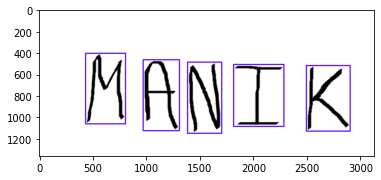

In [2]:
import cv2 #it is used for capturing the image present in the dataset
import numpy as np #NumPy is a Python library used for working with arrays
from matplotlib import pyplot as plt  #matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB.
%matplotlib inline 

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('manik.png') #image read 
height, width, depth = image.shape   #! 

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
# grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #cvtColor() method is used to convert an image from one color space to another



#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


#dilation #dilate() is an OpenCV function in Python that applies a morphological filter to images. The cv2. dilate() method takes two inputs, of which one is our input image; the second is called the structuring element or kernel, which decides the nature of the operation.
kernel = np.ones((5,5), np.uint8) #numpy.ones() function returns a new array of given shape and type, with ones.
img_dilation = cv2.dilate(thresh, kernel, iterations=1) #Dilation adds pixels to the boundaries of objects in an image,


#adding GaussianBlur- GaussianBlur() method of cv2 library to blur an image. The blurring of an image means smoothening of an image i.e., removing outlier pixels that may be noise in the image.
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
# im2
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #detects changes in images and marks as a contours.

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0]) #boundingRect() function is used to draw an approximate rectangle around the binary image. 
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

Predicted String: MANIK


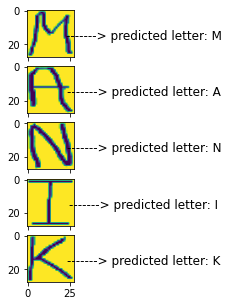

In [3]:

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    
    m.append(roi)
    # pred = (model.predict(t) > 0.5).astype("int32")
    #pred = model.predict_classes(t)
    pred = np.argmax(model.predict(t),axis=-1)
    pchl.append(pred)

if len(pchl)>1:   
    pcw = list()
    interp = 'bilinear'
    fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
    for i in range(len(pchl)):
        #print(pchl[i][0])
        pcw.append(characters[pchl[i][0]])
        axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
        axs[i].imshow(m[i], interpolation=interp)
    predstring = ''.join(pcw)
    fig.savefig('..//predicted.png')
    print('Predicted String: '+predstring)
else:  

    pcw = list()
    interp = 'bilinear'
    fig, axs = plt.subplots(nrows=1, sharex=True, figsize=(2,2))
    pcw.append(characters[pred[0]])
    axs.set_title('-------> predicted letter: '+characters[pred[0]] ,x=2.5,y=0.2)
    axs.imshow(m[i], interpolation=interp)
    plt.show()

    predstring = ''.join(pcw)
    #fig.savefig('../assets/predicted.png')
    print('Predicted String: '+predstring)  

##mutiple image working plot   
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    
    m.append(roi)
    #pred = (model.predict(t) > 0.5).astype("int32")
    pred = model.predict_classes(t)
    pchl.append(pred)

    
pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
    #print(pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)

#single image working plot    
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    
    m.append(roi)
    #pred = (model.predict(t) > 0.5).astype("int32")
    pred = model.predict_classes(t)
    pchl.append(pred)

pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=1, sharex=True, figsize=(2,2))
pcw.append(characters[pred[0]])
axs.set_title('-------> predicted letter: '+characters[pred[0]] ,x=2.5,y=0.2)
axs.imshow(m[i], interpolation=interp)
plt.show()

predstring = ''.join(pcw)
print('Predicted String: '+predstring)  